# Step 2: Data Collection & Initial EDA of Candidate Datasets
## Dataset 1: iMaterialist (Fashion) 2020 at FGVC7

### MLE Capstone: Outfit Recommender - Spring 2021
### By: Bazeley, Mikiko 
### GH: [@mmbazel](https://github.com/MMBazel)  

In this notebook, I'll be exploring one of three datasets (DeepFashion, Paperdoll, and iMaterialist). 

Specifically in this notebook we'll: 

☑️ Load the data

☑️ Explore the dimensions of the dataset

☑️ Understand what categories are being represented

☑️ Explore samples of the data (the meta data dictionary with catgories & attributes labels, the Train 🚂 file, and finally the images 📸 themselves)

☑️ Understand distributions of categories, attributes

<hr style="border-top: 5px solid black; margin-top: 1px; margin-bottom: 1px"></hr>

## Explanation of the data, according to the kaggle page here: 
https://www.kaggle.com/c/imaterialist-fashion-2020-fgvc7/data

### Files
* train/ - The training images
* test/ - The test images (you are segmenting and classifying these images)
* train.csv - Training annotations, contains images with both segmented apparel categories and fine-grained attributes; and images with segmented apparel categories only.
* label_descriptions.json - A file giving the apparel categories and fine-grained attributes descriptions.
* sample_submission.csv - A sample submission file in the correct format.

### Columns
* ImageId - the unique Id of an image
* EncodedPixels - masks in run-length encoded format (please refer to evaluation page for details).
* ClassId - the class id for this mask. It represents the apparel category.
* AttributesIds - the attributes ids for this mask. We concatenate all the attributes (if any) together.

### ⚠️📝 Notes (About the Notebooks) ⚠️📝 

My guiding principles:
* ➡️ Be overly communicative = While that leads to verbose commenting, I hope that means I catch a bunch of questions early)  
* ➡️ Human-readable over witty-optimization = For the most part I try to make everything I'm doing obvious
* ➡️ Write as much code as needed, and no more = There's a time and place for error-catching & object-oriented code & there are ways to make the notebook reproducible. That's not quite the goal for this notebook (or any of the other notebooks in the early stages of the project) and my goal was to write just the code needed to get this step done.  

<hr style="border-top: 5px solid black; margin-top: 1px; margin-bottom: 1px"></hr>

# <span style='background :red' > Step 1: Proper set-up & installation of necessary libraries & packages </span> 

1. Ensure you've set-up with the Kaggle API
* Pro Tip: If you're trying to set up the path to the kaggle.json file as an environment variable on MacOS (Catalina), easiest way is to set at the command line. It was annoying dealing with the different editors like vim & nano. 

$ KAGGLE_CONFIG_DIR= {INSERT_YOUR_HOMEPATH_HERE}/.kaggle export KAGGLE_CONFIG_DIR


In [1]:
##################### [TODO] SETUP #####################
# [TODO] Import any utilities functions


import json
import os
import sys
from dotenv import load_dotenv

from IPython.display import Image, display

import kaggle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

print('Packages Imported')

modules = dir()

print(modules)
#print(os.environ)

# [TODO] Package install/load

Packages Imported
['Image', 'In', 'Out', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_ih', '_ii', '_iii', '_oh', 'display', 'exit', 'get_ipython', 'json', 'kaggle', 'load_dotenv', 'np', 'os', 'pd', 'plt', 'quit', 'sys']


In [2]:
# Confirm all the right libraries are present
# This is an important step because there's a good chance
# that for some pckaes where you use pip or pip3 install
# they could download to the wrong directory if you're not
# using the right pip executable

!conda list

# packages in environment at /Users/mikikobazeley/opt/anaconda3/envs/SPRINGBOARD_MLE_CAPSTONE_ENV:
#
# Name                    Version                   Build  Channel
_py-xgboost-mutex         2.0                       cpu_0  
_pytorch_select           0.1                       cpu_0    anaconda
_tflow_select             2.3.0                       mkl  
absl-py                   0.11.0             pyhd3eb1b0_1  
appnope                   0.1.2           py37hecd8cb5_1001  
argon2-cffi               20.1.0           py37haf1e3a3_1    anaconda
astor                     0.8.1            py37hecd8cb5_0  
async_generator           1.10             py37h28b3542_0    anaconda
attrs                     20.3.0             pyhd3eb1b0_0  
backcall                  0.2.0              pyhd3eb1b0_0  
blas                      1.0                         mkl  
bleach                    3.3.0              pyhd3eb1b0_0  
blis                      0.7.4                    pypi_0    pypi
brotlipy      

In [3]:
# Confirm path of working directory

!pwd 

/Users/mikikobazeley/Github/personal/MMBazel/Wardrobe-Recommender/notebooks/Step2_EDA


<hr style="border-top: 5px solid black; margin-top: 1px; margin-bottom: 1px"></hr>

# <span style='background :red' > Step 2: Download iMaterialist Dataset</span> 

In order to download competition datasets, the following needs to happen: 

1️⃣ You've installed kaggle via pip, pip3, or conda install 

2️⃣ You've set up your credentials as described in the official Kaggle GH repo (https://github.com/Kaggle/kaggle-api). This was also helpful (https://adityashrm21.github.io/Setting-Up-Kaggle/). 

3️⃣ You've accepted the comptition rules (or else you'll get a "403 - Forbidden").

4️⃣ You need to add the alias for kaggle to your .zshrc or .bashrc (similar to this tutorial on Sublime: https://gist.github.com/barnes7td/3804534#file-sublime_setup-md) or as written about on this tutorial (https://github.com/Kaggle/kaggle-api/issues/59). In the notebook I choose to use the path to the kaggle file but aliasing is a good way to go.

In [4]:
# Using the correct kaggle executablem download the dataset to my external drive 
# ! NOTE: The total dataset is at least 20 GB - Make sure to keep your connection active
# ! and change download path to an external or specified folder 
# The format should be: 
# <path-to-kaggle-directory-or-use alias>kaggle competitions download -c imaterialist-fashion-2020-fgvc7 -p <path-of-folder-to-download-data-to>

# [UNCOMMENT BELOW] To run the command within the Jupyter notebook
# !~/.local/bin/kaggle competitions download -c imaterialist-fashion-2020-fgvc7 -p /Volumes/MiniGator/Projects/Datasets/iMaterialist

In [5]:
# Confirm zipfile has been downloaded to the repo
# Replace path with the path-to-dowloaded-dataset

!ls /Volumes/MiniGator/Projects/Datasets/iMaterialist

imaterialist-fashion-2020-fgvc7.zip test
label_descriptions.json             train
sample_submission.csv               train.csv


In [6]:
# Unzip to the same directory
# ! NOTE: If no path is provided, unzip will just unzip files 
# to your current-working-directory & NOT the same folder


# [UNCOMMENT BELOW] To run the command within the Jupyter notebook
# !unzip /Volumes/MiniGator/Projects/Datasets/iMaterialist/imaterialist-fashion-2020-fgvc7.zip -d /Volumes/MiniGator/Projects/Datasets/iMaterialist/

In [7]:
# List all files and folders, confirming we have all the data 

!ls -a -F /Volumes/MiniGator/Projects/Datasets/iMaterialist

./                                   sample_submission.csv*
../                                  test/
imaterialist-fashion-2020-fgvc7.zip* train/
label_descriptions.json*             train.csv*


<hr style="border-top: 5px solid black; margin-top: 1px; margin-bottom: 1px"></hr>

# <span style='background :red' > Step 3: Use CLI to start initial exploration 🔬  </span> 

We want to understand:

☑️ The data repository structure

☑️ Number of files, types of files

☑️ Type of information being captured & how it's represented 



<span style='background :yellow' > 💡 Given the size of the dataset, doing initial inspection with shell is fast & easy.
No need to break Jupyter before even getting started.  </span> 

In [8]:
# Sample list of images in train folder

!ls /Volumes/MiniGator/Projects/Datasets/iMaterialist/train | head -n 20

00000663ed1ff0c4e0132b9b9ac53f6e.jpg
0000fe7c9191fba733c8a69cfaf962b7.jpg
0002ec21ddb8477e98b2cbb87ea2e269.jpg
0002f5a0ebc162ecfb73e2c91e3b8f62.jpg
0004467156e47b0eb6de4aa6479cbd15.jpg
00048c3a2fb9c29340473c4cfc06424a.jpg
0006ea84499fd9a06fefbdf47a5eb4c0.jpg
000775b6b5e27b011dc8bba2d7b85211.jpg
000aac3870ea7c59ca0333ffa5327323.jpg
000b3a87508b0fa185fbd53ecbe2e4c6.jpg
000b3ec2c6eaffb491a5abb72c2e3e26.jpg
000c5bb8ca785bce8d00e3a6c7802a8c.jpg
000c9b4926cd78edd4c19cbc6beba111.jpg
000cd2e13d1bdd28f480304d7bb9e1ca.jpg
000e147149bf33c584afaa953bc198ed.jpg
000e18920575a2e59b3a0c38e6546d29.jpg
000e973c99dc090afd7898c93daf0dbc.jpg
00102686c01fa625aba3b2478f48f415.jpg
001039acb67251508b1b32fd37a49f43.jpg
0010ef2da53cd76ee26122a65f6e76ee.jpg


In [9]:
# Total number of images in train folder

!ls -a /Volumes/MiniGator/Projects/Datasets/iMaterialist/train | wc -l

   45625


In [10]:
# Sample list of images in test folder

!ls /Volumes/MiniGator/Projects/Datasets/iMaterialist/test | head -n 20

003d41dd20f271d27219fe7ee6de727d.jpg
0046f98599f05fd7233973e430d6d04d.jpg
004e9e21cd1aca568a8ffc77a54638ce.jpg
005b37fce3c0f641d327d95dd832f51b.jpg
0094940c58c343b742f48ae26eb5e9fa.jpg
0099bc6cd3b8c47c2d21a2877b1fa533.jpg
009b107156c1ee41b03c5b35a82e7232.jpg
00a1940434d687a785be0acf2b0fbff3.jpg
00a325fd4dc22079095ab46330abf7be.jpg
00a8764cff12b2e849c850f4be5608bc.jpg
00d5da56c02d426c4e4bf802b1888471.jpg
00d6e5891b7507fccbd49f2c2756b114.jpg
00e45dd233e31906f538ba17dd45bf29.jpg
00f1db534538841931f15f2bb5cec76c.jpg
00faa1032cc0809974a8d2dd7b018497.jpg
010cf2ab96d1d730e15c76720af0e1a6.jpg
011ccdc0d82e359420e5b578740d7971.jpg
0146a53e12d690914995248fb6872121.jpg
014c44b97f844dffda594b9e00a4b3fd.jpg
014eadcd4cf28a669232d4b6470e4e01.jpg


In [11]:
# Total number of images in test folder

!ls -a /Volumes/MiniGator/Projects/Datasets/iMaterialist/test | wc -l

    3202


In [12]:
# First 20 rows of the sample submission file included, for use in Kaggle competition

! head -n 20 /Volumes/MiniGator/Projects/Datasets/iMaterialist/sample_submission.csv

ImageId,EncodedPixels,ClassId,AttributesIds
003d41dd20f271d27219fe7ee6de727d,1 1,0,"111,137"
0046f98599f05fd7233973e430d6d04d,1 1,0,"111,137"
004e9e21cd1aca568a8ffc77a54638ce,1 1,0,"111,137"
005b37fce3c0f641d327d95dd832f51b,1 1,0,"111,137"
0094940c58c343b742f48ae26eb5e9fa,1 1,0,"111,137"
0099bc6cd3b8c47c2d21a2877b1fa533,1 1,0,"111,137"
009b107156c1ee41b03c5b35a82e7232,1 1,0,"111,137"
00a1940434d687a785be0acf2b0fbff3,1 1,0,"111,137"
00a325fd4dc22079095ab46330abf7be,1 1,0,"111,137"
00a8764cff12b2e849c850f4be5608bc,1 1,0,"111,137"
00d5da56c02d426c4e4bf802b1888471,1 1,0,"111,137"
00d6e5891b7507fccbd49f2c2756b114,1 1,0,"111,137"
00e45dd233e31906f538ba17dd45bf29,1 1,0,"111,137"
00f1db534538841931f15f2bb5cec76c,1 1,0,"111,137"
00faa1032cc0809974a8d2dd7b018497,1 1,0,"111,137"
010cf2ab96d1d730e15c76720af0e1a6,1 1,0,"111,137"
011ccdc0d82e359420e5b578740d7971,1 1,0,"111,137"
0146a53e12d690914995248fb6872121,1 1,0,"111,137"
014c44b97f844dffda594b9e00a4b3fd,1 1,0,"111,137"


In [13]:
# First 20 rows of train metadata

! head -n 2 /Volumes/MiniGator/Projects/Datasets/iMaterialist/train.csv

ImageId,EncodedPixels,Height,Width,ClassId,AttributesIds
00000663ed1ff0c4e0132b9b9ac53f6e,6068157 7 6073371 20 6078584 34 6083797 48 6089010 62 6094223 72 6099436 76 6104649 80 6109862 85 6115075 89 6120288 93 6125501 98 6130714 102 6135927 106 6141140 111 6146354 114 6151567 118 6156780 123 6161993 127 6167206 131 6172419 136 6177632 140 6182845 144 6188058 149 6193271 153 6198484 157 6203697 162 6208910 166 6214124 169 6219337 174 6224550 178 6229763 182 6234976 187 6240189 191 6245402 195 6250615 200 6255828 204 6261041 208 6266254 213 6271467 218 6276680 224 6281893 229 6287107 233 6292320 238 6297533 244 6302746 249 6307959 254 6313172 259 6318385 265 6323598 270 6328811 275 6334024 280 6339237 286 6344450 291 6349663 296 6354877 300 6360090 306 6365303 311 6370516 316 6375729 322 6380942 327 6386155 332 6391368 337 6396581 343 6401794 348 6407007 353 6412220 358 6417433 364 6422647 368 6427860 373 6433073 378 6438286 384 6443499 389 6448712 394 6453925 399 6459138 405 6464351 410

In [14]:
# First 100 lines of the label_descriptions.json

! head -n 100 /Volumes/MiniGator/Projects/Datasets/iMaterialist/label_descriptions.json

{
  "categories": [
    {
      "id": 0,
      "name": "shirt, blouse",
      "supercategory": "upperbody",
      "level": 2
    },
    {
      "id": 1,
      "name": "top, t-shirt, sweatshirt",
      "supercategory": "upperbody",
      "level": 2
    },
    {
      "id": 2,
      "name": "sweater",
      "supercategory": "upperbody",
      "level": 2
    },
    {
      "id": 3,
      "name": "cardigan",
      "supercategory": "upperbody",
      "level": 2
    },
    {
      "id": 4,
      "name": "jacket",
      "supercategory": "upperbody",
      "level": 2
    },
    {
      "id": 5,
      "name": "vest",
      "supercategory": "upperbody",
      "level": 2
    },
    {
      "id": 6,
      "name": "pants",
      "supercategory": "lowerbody",
      "level": 2
    },
    {
      "id": 7,
      "name": "shorts",
      "supercategory": "lowerbody",
      "level": 2
    },
    {
      "id": 8,
      "name": "skirt",
      "supercategory": "lowerbody",
      "level": 2
    },
    {
     

<hr style="border-top: 5px solid black; margin-top: 1px; margin-bottom: 1px"></hr>

# <span style='background :red' > Step 4A: 🔬 Deeper EDA & Exploration of Dictionary 📚</span> 

☑️ Explore samples of the data (the meta data dictionary with catgories & attributes labels, the Train 🚂 file, and finally the images 📸 themselves)

☑️ Understand distributions of categories, attributes

## <span style='background :orange' > Loading the categories and attributes dictionary from JSON </span>


In [15]:
# Loading file & transposng to get the right shape

label_descriptions_df = (pd.read_json('/Volumes/MiniGator/Projects/Datasets/iMaterialist/label_descriptions.json',orient='index')
                         .T)

label_descriptions_df.head(20)

,categories,attributes
0,"{'id': 0, 'name': 'shirt, blouse', 'supercateg...","{'id': 0, 'name': 'classic (t-shirt)', 'superc..."
1,"{'id': 1, 'name': 'top, t-shirt, sweatshirt', ...","{'id': 1, 'name': 'polo (shirt)', 'supercatego..."
2,"{'id': 2, 'name': 'sweater', 'supercategory': ...","{'id': 2, 'name': 'undershirt', 'supercategory..."
3,"{'id': 3, 'name': 'cardigan', 'supercategory':...","{'id': 3, 'name': 'henley (shirt)', 'supercate..."
4,"{'id': 4, 'name': 'jacket', 'supercategory': '...","{'id': 4, 'name': 'ringer (t-shirt)', 'superca..."
5,"{'id': 5, 'name': 'vest', 'supercategory': 'up...","{'id': 5, 'name': 'raglan (t-shirt)', 'superca..."
6,"{'id': 6, 'name': 'pants', 'supercategory': 'l...","{'id': 6, 'name': 'rugby (shirt)', 'supercateg..."
7,"{'id': 7, 'name': 'shorts', 'supercategory': '...","{'id': 7, 'name': 'sailor (shirt)', 'supercate..."
8,"{'id': 8, 'name': 'skirt', 'supercategory': 'l...","{'id': 8, 'name': 'crop (top)', 'supercategory..."
9,"{'id': 9, 'name': 'coat', 'supercategory': 'wh...","{'id': 9, 'name': 'halter (top)', 'supercatego..."


## <span style='background :orange' > High-Level Describing </span>

In [16]:
label_descriptions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   categories  46 non-null     object
 1   attributes  294 non-null    object
dtypes: object(2)
memory usage: 4.7+ KB


In [17]:
label_descriptions_df.describe()

,categories,attributes
count,46,294
unique,46,294
top,"{'id': 23, 'name': 'shoe', 'supercategory': 'l...","{'id': 20, 'name': 'biker (jacket)', 'supercat..."
freq,1,1


## <span style='background :orange' > Examining individual cells & entries </span>

In [18]:
# This corresponds to the first row & first column (categories)

label_descriptions_df.loc[0][0]

{'id': 0, 'name': 'shirt, blouse', 'supercategory': 'upperbody', 'level': 2}

In [19]:
# This corresponds to the first row & second column (attributes)

label_descriptions_df.loc[0][1]

{'id': 0, 'name': 'classic (t-shirt)', 'supercategory': 'nickname', 'level': 1}

In [20]:
# This corresponds to the second row & first column (categories)

label_descriptions_df.loc[1][0]

{'id': 1,
 'name': 'top, t-shirt, sweatshirt',
 'supercategory': 'upperbody',
 'level': 2}

In [21]:
# This corresponds to the second row & second column (attributes)

label_descriptions_df.loc[1][1]

{'id': 1, 'name': 'polo (shirt)', 'supercategory': 'nickname', 'level': 1}

In [22]:
# This corresponds to the 16th row & first column (categories)

label_descriptions_df.loc[15][0]

{'id': 15,
 'name': 'headband, head covering, hair accessory',
 'supercategory': 'head',
 'level': 2}

## <span style='background :orange' > Examining Nulls </span>

⚠️ The creators of the dataset did something interesting -- they stuck two separate dictioanies together in a single JSON file. So while it looks like there are nulls in the categories column past 46 corresponding to attributes, that's not quite accurate. 

🤔 As we need to explore the "nulls" we need to remember they're not "true nulls" but the result of the dataset author's decision to save space & memory by dumping two lists of separate lengths together.

In [23]:
# Let's locate all rows of categories that don't have attributes

label_desc_isNull_df = label_descriptions_df.loc[pd.isnull(label_descriptions_df['categories'])]
label_desc_isNull_df

,categories,attributes
46,None,"{'id': 46, 'name': 'peg (pants)', 'supercatego..."
47,None,"{'id': 47, 'name': 'camo (pants)', 'supercateg..."
48,None,"{'id': 48, 'name': 'track (pants)', 'supercate..."
49,None,"{'id': 49, 'name': 'crop (pants)', 'supercateg..."
50,None,"{'id': 50, 'name': 'short (shorts)', 'supercat..."
...,...,...
289,None,"{'id': 336, 'name': 'peacock', 'supercategory'..."
290,None,"{'id': 337, 'name': 'zebra', 'supercategory': ..."
291,None,"{'id': 338, 'name': 'giraffe', 'supercategory'..."
292,None,"{'id': 339, 'name': 'toile de jouy', 'supercat..."


In [24]:
label_desc_isNull_df.head(20)

,categories,attributes
46,None,"{'id': 46, 'name': 'peg (pants)', 'supercatego..."
47,None,"{'id': 47, 'name': 'camo (pants)', 'supercateg..."
48,None,"{'id': 48, 'name': 'track (pants)', 'supercate..."
49,None,"{'id': 49, 'name': 'crop (pants)', 'supercateg..."
50,None,"{'id': 50, 'name': 'short (shorts)', 'supercat..."
51,None,"{'id': 51, 'name': 'booty (shorts)', 'supercat..."
52,None,"{'id': 52, 'name': 'bermuda (shorts)', 'superc..."
53,None,"{'id': 53, 'name': 'cargo (shorts)', 'supercat..."
54,None,"{'id': 54, 'name': 'trunks', 'supercategory': ..."
55,None,"{'id': 55, 'name': 'boardshorts', 'supercatego..."


In [25]:
#Let's check out some specfic exaples
label_desc_isNull_df.loc[46][1]

{'id': 46, 'name': 'peg (pants)', 'supercategory': 'nickname', 'level': 1}

In [26]:
label_desc_isNull_df.loc[62][1]

{'id': 62, 'name': 'tutu (skirt)', 'supercategory': 'nickname', 'level': 1}

In [27]:
label_desc_isNull_df.loc[65][1]

{'id': 65, 'name': 'skater (skirt)', 'supercategory': 'nickname', 'level': 1}

In [28]:
label_desc_isNull_df.tail(20)

,categories,attributes
274,None,"{'id': 321, 'name': 'camouflage', 'supercatego..."
275,None,"{'id': 322, 'name': 'check', 'supercategory': ..."
276,None,"{'id': 323, 'name': 'dot', 'supercategory': 't..."
277,None,"{'id': 324, 'name': 'fair isle', 'supercategor..."
278,None,"{'id': 325, 'name': 'floral', 'supercategory':..."
279,None,"{'id': 326, 'name': 'geometric', 'supercategor..."
280,None,"{'id': 327, 'name': 'paisley', 'supercategory'..."
281,None,"{'id': 328, 'name': 'stripe', 'supercategory':..."
282,None,"{'id': 329, 'name': 'houndstooth (pattern)', '..."
283,None,"{'id': 330, 'name': 'herringbone (pattern)', '..."


In [29]:
label_desc_isNull_df.loc[293][1]

{'id': 340, 'name': 'plant', 'supercategory': 'textile pattern', 'level': 1}

In [30]:
label_desc_isNull_df.loc[274][1]

{'id': 321,
 'name': 'camouflage',
 'supercategory': 'textile pattern',
 'level': 1}

In [31]:
label_desc_isNull_df.loc[287][1]

{'id': 334,
 'name': 'snakeskin (pattern)',
 'supercategory': 'animal',
 'level': 2}

## <span style='background :orange' > Cleaning Up Categories & Attributes Dicts </span>

### <span style='background :yellow' > Cleaning Up Categories </span>

We're going to pull out and split the categories list from the attributes list. We'll also make the columns easier to track by renaming, etc.

In [32]:
# We'll save off a copy of the dataframe for inspection. 
# It'll be deleted manually later once we're happy with the quality.

categories_notNull_df = label_descriptions_df.loc[pd.notnull(label_descriptions_df['categories'])]
categories_notNull_df = pd.json_normalize(categories_notNull_df['categories'])
categories_notNull_df.to_csv('../../data/interim/categories_notNull_df.csv')
categories_notNull_df

,id,name,supercategory,level
0,0,"shirt, blouse",upperbody,2
1,1,"top, t-shirt, sweatshirt",upperbody,2
2,2,sweater,upperbody,2
3,3,cardigan,upperbody,2
4,4,jacket,upperbody,2
5,5,vest,upperbody,2
6,6,pants,lowerbody,2
7,7,shorts,lowerbody,2
8,8,skirt,lowerbody,2
9,9,coat,wholebody,2


In [33]:
categories_notNull_df = categories_notNull_df.rename(
                                columns={'id':'id_categories',
                                        'name':'name_categories',
                                        'supercategory':'supercategory_categories',
                                        'level':'level_categories'})
categories_notNull_df = categories_notNull_df.set_index('id_categories')
categories_notNull_df

,name_categories,supercategory_categories,level_categories
id_categories,,,
0,"shirt, blouse",upperbody,2
1,"top, t-shirt, sweatshirt",upperbody,2
2,sweater,upperbody,2
3,cardigan,upperbody,2
4,jacket,upperbody,2
5,vest,upperbody,2
6,pants,lowerbody,2
7,shorts,lowerbody,2
8,skirt,lowerbody,2


<AxesSubplot:>

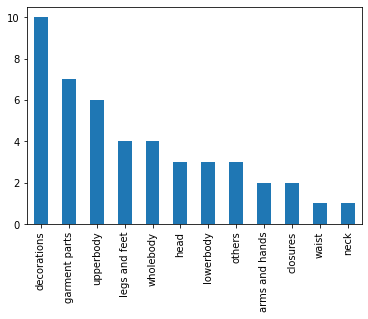

In [34]:
#Checking out the distribution of the categories 

(categories_notNull_df['supercategory_categories']
 .value_counts()
 .plot(kind='bar'))

### <span style='background :yellow' > Cleaning Up Attributes </span>

Same exact process as we did with categories above. 

In [35]:
# We'll save off a copy of the dataframe for inspection. 
# It'll be deleted manually later once we're happy with the quality.

attributes_df = pd.json_normalize(label_descriptions_df['attributes'])
attributes_df.to_csv('../../data/interim/attributes_df.csv')
attributes_df

,id,name,supercategory,level
0,0,classic (t-shirt),nickname,1
1,1,polo (shirt),nickname,1
2,2,undershirt,nickname,1
3,3,henley (shirt),nickname,1
4,4,ringer (t-shirt),nickname,1
...,...,...,...,...
289,336,peacock,animal,2
290,337,zebra,animal,2
291,338,giraffe,animal,2
292,339,toile de jouy,textile pattern,1


In [36]:
# Especially for attributes, it's important we set the id_attributes column as the index
# as we intend to use the dataframes for merging later.
# The reason why we'd want to set the index instead of just using the default pandas index?
# You'll see later but essentially the dataset creators, when creating the JSON file,
# skipped numbering the attribute ID's i.e. starting from Attribute ID=281 skip
# ahead by 40+. 
# Lucikly this seems to align with the attribute ID's captured in the Train file.
# Keep going, more explanation below.


attributes_df = attributes_df.rename(columns={'id':'id_attributes',
                                        'name':'name_attributes',
                                        'supercategory':'supercategory_attributes',
                                        'level':'level_attributes'})
attributes_df = attributes_df.set_index('id_attributes')
attributes_df

,name_attributes,supercategory_attributes,level_attributes
id_attributes,,,
0,classic (t-shirt),nickname,1
1,polo (shirt),nickname,1
2,undershirt,nickname,1
3,henley (shirt),nickname,1
4,ringer (t-shirt),nickname,1
...,...,...,...
336,peacock,animal,2
337,zebra,animal,2
338,giraffe,animal,2


<AxesSubplot:>

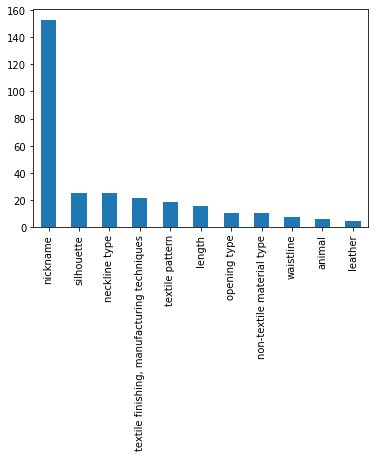

In [37]:
(attributes_df['supercategory_attributes']
 .value_counts()
 .plot(kind='bar'))

<hr style="border-top: 5px solid black; margin-top: 1px; margin-bottom: 1px"></hr>

# <span style='background :red' > Step 4B: 🔬 Deeper EDA & Exploration of Train 🚂 File </span> 

## <span style='background :orange' > Loading the train.csv file 🚂 </span> 

We can note the following:
1. The same image is repeated multiple times but with a unique:
    * ClassId
    * Encoded Pixels
    * AttributesIds
    
2. Not all ImageIds have corresponding AttributesIds
3. AtributeIds are off, starting at AttributeId = 281, which jumps from the prior entry of AttributeId = 234. We also see that the column AttributeIds in the train data_df include AttrbiuteId values of 300+. As part of futher processing we'd need to visually confirm that the train images with AttributeId's of 235-293 are correctly labeled. 

In [38]:
# We load one chunk to visually examine (so that we dont overload the notebook memory)
with pd.read_csv("/Volumes/MiniGator/Projects/Datasets/iMaterialist/train.csv",chunksize=100) as reader:
    print(reader.get_chunk(20))

                             ImageId  \
0   00000663ed1ff0c4e0132b9b9ac53f6e   
1   00000663ed1ff0c4e0132b9b9ac53f6e   
2   00000663ed1ff0c4e0132b9b9ac53f6e   
3   00000663ed1ff0c4e0132b9b9ac53f6e   
4   00000663ed1ff0c4e0132b9b9ac53f6e   
5   00000663ed1ff0c4e0132b9b9ac53f6e   
6   00000663ed1ff0c4e0132b9b9ac53f6e   
7   00000663ed1ff0c4e0132b9b9ac53f6e   
8   00000663ed1ff0c4e0132b9b9ac53f6e   
9   0000fe7c9191fba733c8a69cfaf962b7   
10  0000fe7c9191fba733c8a69cfaf962b7   
11  0002ec21ddb8477e98b2cbb87ea2e269   
12  0002ec21ddb8477e98b2cbb87ea2e269   
13  0002ec21ddb8477e98b2cbb87ea2e269   
14  0002ec21ddb8477e98b2cbb87ea2e269   
15  0002f5a0ebc162ecfb73e2c91e3b8f62   
16  0002f5a0ebc162ecfb73e2c91e3b8f62   
17  0002f5a0ebc162ecfb73e2c91e3b8f62   
18  0004467156e47b0eb6de4aa6479cbd15   
19  0004467156e47b0eb6de4aa6479cbd15   

                                        EncodedPixels  Height  Width  ClassId  \
0   6068157 7 6073371 20 6078584 34 6083797 48 608...    5214   3676        6 

In [39]:
# Now I'll load the file straight; for bigger files howver, it can make sense
# to still do lazy loading

train_df = pd.read_csv("/Volumes/MiniGator/Projects/Datasets/iMaterialist/train.csv")

## <span style='background :orange' > Examine the Train file 🚂</span> 

In [40]:
train_df.head(15)

,ImageId,EncodedPixels,Height,Width,ClassId,AttributesIds
0,00000663ed1ff0c4e0132b9b9ac53f6e,6068157 7 6073371 20 6078584 34 6083797 48 608...,5214,3676,6,"115,136,143,154,230,295,316,317"
1,00000663ed1ff0c4e0132b9b9ac53f6e,6323163 11 6328356 32 6333549 53 6338742 75 63...,5214,3676,0,"115,136,142,146,225,295,316,317"
2,00000663ed1ff0c4e0132b9b9ac53f6e,8521389 10 8526585 30 8531789 42 8537002 46 85...,5214,3676,28,163
3,00000663ed1ff0c4e0132b9b9ac53f6e,12903854 2 12909064 7 12914275 10 12919485 15 ...,5214,3676,31,"160,204"
4,00000663ed1ff0c4e0132b9b9ac53f6e,10837337 5 10842542 14 10847746 24 10852951 33...,5214,3676,32,219
5,00000663ed1ff0c4e0132b9b9ac53f6e,11464158 10 11469372 30 11474586 43 11479800 4...,5214,3676,32,219
6,00000663ed1ff0c4e0132b9b9ac53f6e,5910568 31 5915775 65 5920982 69 5926189 73 59...,5214,3676,31,"160,204"
7,00000663ed1ff0c4e0132b9b9ac53f6e,6421446 292 6426657 298 6431867 305 6437078 31...,5214,3676,29,174
8,00000663ed1ff0c4e0132b9b9ac53f6e,4566382 8 4571592 25 4576803 41 4582013 58 458...,5214,3676,4,"17,115,136,145,149,225,295,311,317"
9,0000fe7c9191fba733c8a69cfaf962b7,2201176 1 2203623 3 2206071 5 2208518 8 221096...,2448,2448,33,190


In [41]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333401 entries, 0 to 333400
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ImageId        333401 non-null  object
 1   EncodedPixels  333401 non-null  object
 2   Height         333401 non-null  int64 
 3   Width          333401 non-null  int64 
 4   ClassId        333401 non-null  int64 
 5   AttributesIds  206410 non-null  object
dtypes: int64(3), object(3)
memory usage: 15.3+ MB


## <span style='background :orange' > Get Top-Level Counts of Combined Train 🚊  File & Classes Dict 📚 </span> 

In [42]:
# In the Train data:
# ClassId corresponds to the category ID
# Each row in train contains a category label & multiple attribute labels

(train_df[['ClassId','ImageId']]
 .rename(columns={'ImageId':'counts_'})
 .groupby(['ClassId'])
 .count()
 .merge(categories_notNull_df,how='left',left_on='ClassId',right_index=True)
 .reset_index()
 .sort_values('counts_',ascending=False)
 .set_index('name_categories'))

,ClassId,counts_,supercategory_categories,level_categories
name_categories,,,,
sleeve,31,59448,garment parts,2
shoe,23,46374,legs and feet,2
neckline,33,34258,garment parts,2
pocket,32,27179,garment parts,2
dress,10,18739,wholebody,2
"top, t-shirt, sweatshirt",1,16548,upperbody,2
pants,6,12414,lowerbody,2
collar,28,10159,garment parts,2
zipper,35,7991,closures,2


### <span style='background :yellow' > Visualize entire distribution of supercategory categories </span> 

<AxesSubplot:ylabel='supercategory_categories'>

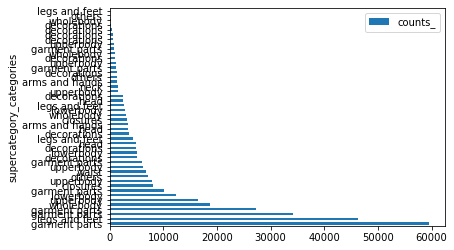

In [43]:
(train_df[['ClassId','ImageId']]
 .rename(columns={'ImageId':'counts_'})
 .groupby(['ClassId'])
 .count()
 .merge(categories_notNull_df,how='left',left_on='ClassId',right_index=True)
 .reset_index().sort_values('counts_',ascending=False)
 .set_index('supercategory_categories')
 .plot(kind='barh',y='counts_',use_index=True))

### <span style='background :yellow' > Visualize top 15 categories by supercategory count</span> 

<AxesSubplot:ylabel='supercategory_categories'>

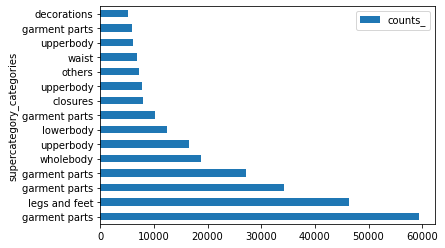

In [44]:
(train_df[['ClassId','ImageId']]
 .rename(columns={'ImageId':'counts_'})
 .groupby(['ClassId'])
 .count()
 .merge(categories_notNull_df,how='left',left_on='ClassId',right_index=True)
 .reset_index()
 .sort_values('counts_',ascending=False)
 .set_index('supercategory_categories')
 .iloc[:15]
 .plot(kind='barh',y='counts_',use_index=True))

### <span style='background :yellow' > Visualize entire distribution of fine category (not super category) count </span> 

<AxesSubplot:ylabel='name_categories'>

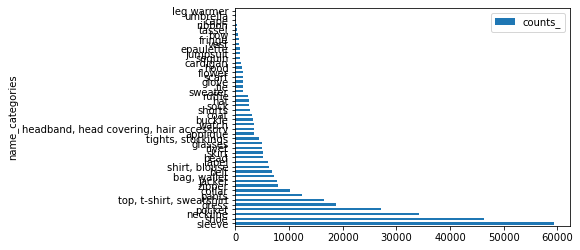

In [45]:
(train_df[['ClassId','ImageId']]
 .rename(columns={'ImageId':'counts_'})
 .groupby(['ClassId'])
 .count()
 .merge(categories_notNull_df,how='left',left_on='ClassId',right_index=True)
 .reset_index().sort_values('counts_',ascending=False)
 .set_index('name_categories')
 .plot(kind='barh',y='counts_',use_index=True))

### <span style='background :yellow' > Visualize top 15 of fine category (not super category) count </span> 

<AxesSubplot:ylabel='name_categories'>

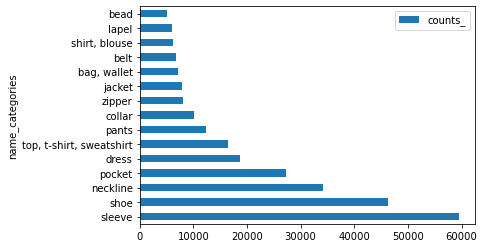

In [46]:
(train_df[['ClassId','ImageId']]
 .rename(columns={'ImageId':'counts_'})
 .groupby(['ClassId'])
 .count()
 .merge(categories_notNull_df,how='left',left_on='ClassId',right_index=True)
 .reset_index()
 .sort_values('counts_',ascending=False)
 .set_index('name_categories')
 .iloc[:15]
 .plot(kind='barh',y='counts_',use_index=True))

## <span style='background :orange' > Get Top-Level Counts of Combined Train 🚊  File & Attributes Dict 📚 </span> 

### <span style='background :yellow' > Select out columns to start analysis of attributes</span> 

In [47]:
# Remember: The same image is represented multiple times with a unique ClassId 
# (aka one image can have multiple items of clothing) and each ClassId (item of clothing)
# can have multiple attributes (details like tpye of fabric, buttons, etc)
# This is why the AttributesIds column has a list of values

train_with_attributes = train_df[['ImageId','ClassId','AttributesIds']]
train_with_attributes

,ImageId,ClassId,AttributesIds
0,00000663ed1ff0c4e0132b9b9ac53f6e,6,"115,136,143,154,230,295,316,317"
1,00000663ed1ff0c4e0132b9b9ac53f6e,0,"115,136,142,146,225,295,316,317"
2,00000663ed1ff0c4e0132b9b9ac53f6e,28,163
3,00000663ed1ff0c4e0132b9b9ac53f6e,31,"160,204"
4,00000663ed1ff0c4e0132b9b9ac53f6e,32,219
...,...,...,...
333396,fffe20b555b98c3c1f26c8dfff275cbc,28,163
333397,ffffbf7014a9e408bfbb81a75bc70638,33,NaN
333398,ffffbf7014a9e408bfbb81a75bc70638,31,157
333399,ffffbf7014a9e408bfbb81a75bc70638,31,157


### <span style='background :yellow' > Explode out attributes to make a long train_attributes dataframe </span> 

In [48]:
# Not all images have associated detailed attributes 
# If we just try to explode out the NaN values, we'll get an error
# So we need to convert the AttributesIds into a list of values (str)
# such that we can then encapsulate as a list, use pd.explode, 
# and then recast as int so we can merge on the indices.
# Phew!

train_with_attributes['AttributesIds'] = train_with_attributes['AttributesIds'].replace(np.nan,-1000).astype(str)
train_with_attributes['AttributesIds'] = train_with_attributes['AttributesIds'].apply(lambda x: list(x.split(",")))

train_with_attributes_long = train_with_attributes.explode('AttributesIds')
train_with_attributes_long['AttributesIds'] = train_with_attributes_long['AttributesIds'].astype(int)
train_with_attributes_long

/Users/mikikobazeley/opt/anaconda3/envs/SPRINGBOARD_MLE_CAPSTONE_ENV/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/mikikobazeley/opt/anaconda3/envs/SPRINGBOARD_MLE_CAPSTONE_ENV/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,ImageId,ClassId,AttributesIds
0,00000663ed1ff0c4e0132b9b9ac53f6e,6,115
0,00000663ed1ff0c4e0132b9b9ac53f6e,6,136
0,00000663ed1ff0c4e0132b9b9ac53f6e,6,143
0,00000663ed1ff0c4e0132b9b9ac53f6e,6,154
0,00000663ed1ff0c4e0132b9b9ac53f6e,6,230
...,...,...,...
333400,ffffbf7014a9e408bfbb81a75bc70638,10,142
333400,ffffbf7014a9e408bfbb81a75bc70638,10,150
333400,ffffbf7014a9e408bfbb81a75bc70638,10,295
333400,ffffbf7014a9e408bfbb81a75bc70638,10,308


In [49]:
# Now we have a count of number of times (not images but occurrences) of the attributes

(train_with_attributes_long[['AttributesIds','ImageId']]
 .rename(columns={'ImageId':'counts_'})
 .groupby(['AttributesIds'])
 .count()
 .merge(attributes_df,how='left',left_on='AttributesIds',right_index=True)
 .reset_index()
 .sort_values('counts_',ascending=False)
 .set_index('name_attributes'))

,AttributesIds,counts_,supercategory_attributes,level_attributes
name_attributes,,,,
NaN,-1000,126991,NaN,NaN
no non-textile material,295,65854,non-textile material type,1.0
symmetrical,115,60164,silhouette,1.0
plain (pattern),317,58468,textile pattern,1.0
set-in sleeve,204,39004,nickname,1.0
...,...,...,...,...
wood,294,4,non-textile material type,1.0
mao (jacket),25,3,nickname,1.0
flamenco (skirt),73,2,nickname,1.0


<AxesSubplot:ylabel='name_attributes'>

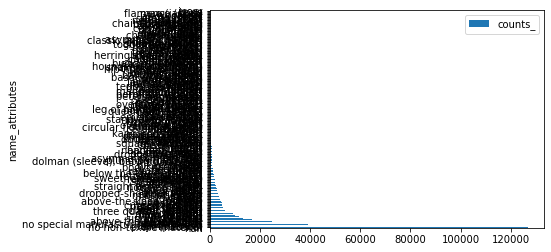

In [50]:
# This should be an ugly mess of a chart -- long tail but we also have a bunch of the 
# top-level categories being repeated

(train_with_attributes_long[['AttributesIds','ImageId']]
 .rename(columns={'ImageId':'counts_'})
 .groupby(['AttributesIds'])
 .count()
 .merge(attributes_df,how='left',left_on='AttributesIds',right_index=True)
 .reset_index().sort_values('counts_',ascending=False)
 .set_index('name_attributes')
 .plot(kind='barh',y='counts_',use_index=True))

<AxesSubplot:ylabel='name_attributes'>

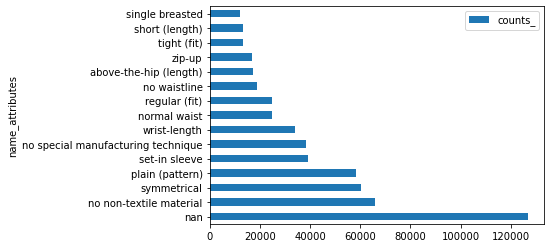

In [51]:
# Grabbing just the first 15, we see there are a bunch of occurrences of NaN
# This isnt surprising as the dataset creators described how only a subset of the original data
# had additional detailed attributes information.

(train_with_attributes_long[['AttributesIds','ImageId']]
 .rename(columns={'ImageId':'counts_'})
 .groupby(['AttributesIds'])
 .count()
 .merge(attributes_df,how='left',left_on='AttributesIds',right_index=True)
 .reset_index()
 .sort_values('counts_',ascending=False)
 .set_index('name_attributes')
 .iloc[:15]
 .plot(kind='barh',y='counts_',use_index=True))

<AxesSubplot:ylabel='name_attributes'>

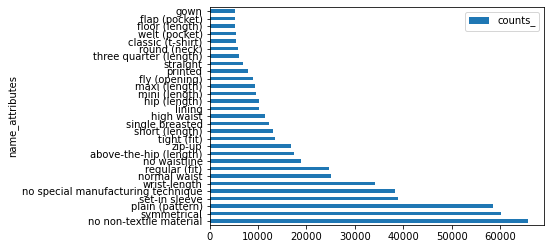

In [52]:
# Ignoring Nan, checking out the top 30 attributes

(train_with_attributes_long[['AttributesIds','ImageId']]
 .rename(columns={'ImageId':'counts_'})
 .groupby(['AttributesIds'])
 .count()
 .merge(attributes_df,how='left',left_on='AttributesIds',right_index=True)
 .reset_index()
 .sort_values('counts_',ascending=False)
 .set_index('name_attributes')
 .iloc[1:30]
 .plot(kind='barh',y='counts_',use_index=True))

## <span style='background :orange' > Finishing EDA 🔬 by Previewing Some Random Images 📸 </span> 

💡 Ideally, it would be best to do a random selection of the images to preview by grabbing a list of the image_file names, creating a list of random numbers, then picking the image whose index corresponds to the random number element. 

🤔 Given that this is just meant to be a cursory preview, we'll do that in later noteboks for the dataset that ultimately gets selected.

In [53]:
path_to_dir = '/Volumes/MiniGator/Projects/Datasets/iMaterialist/train'

In [54]:
listOfImageNames = ['00000663ed1ff0c4e0132b9b9ac53f6e.jpg',
                    '0000fe7c9191fba733c8a69cfaf962b7.jpg',
                    '0002ec21ddb8477e98b2cbb87ea2e269.jpg',
                    '0002f5a0ebc162ecfb73e2c91e3b8f62.jpg',
                    '0004467156e47b0eb6de4aa6479cbd15.jpg',
                    '00048c3a2fb9c29340473c4cfc06424a.jpg',
                    '0006ea84499fd9a06fefbdf47a5eb4c0.jpg'
                   ]

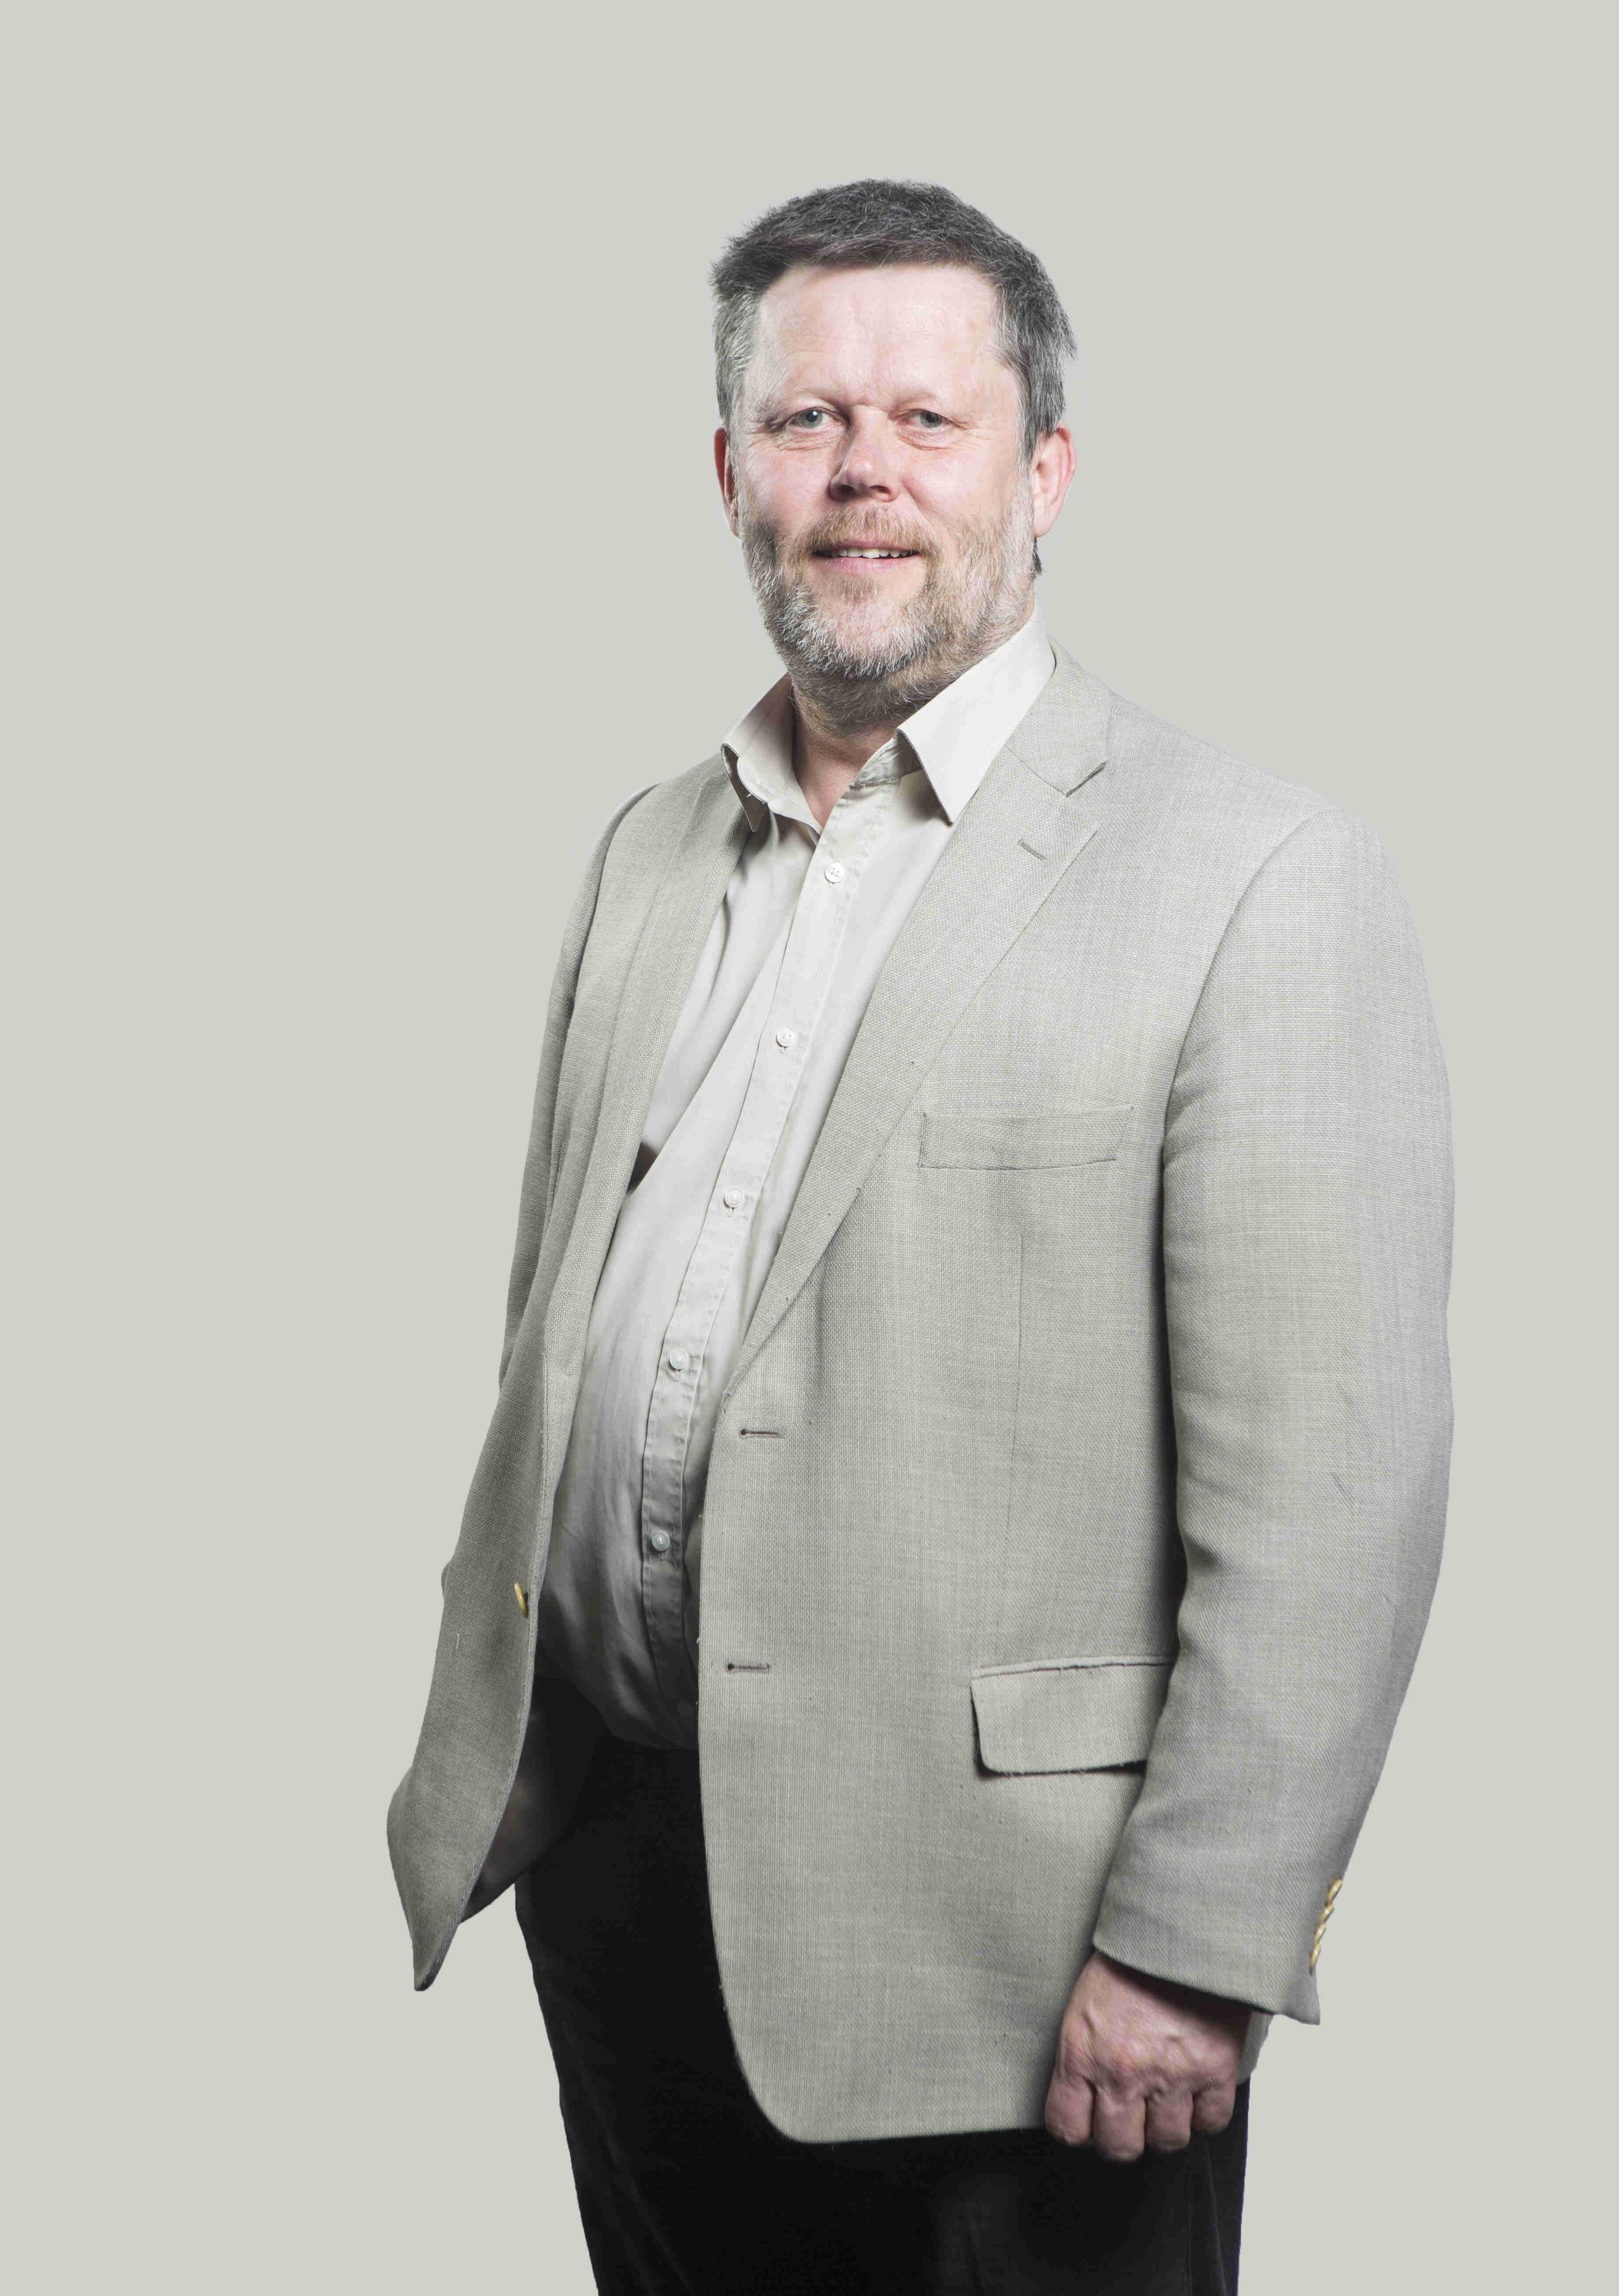

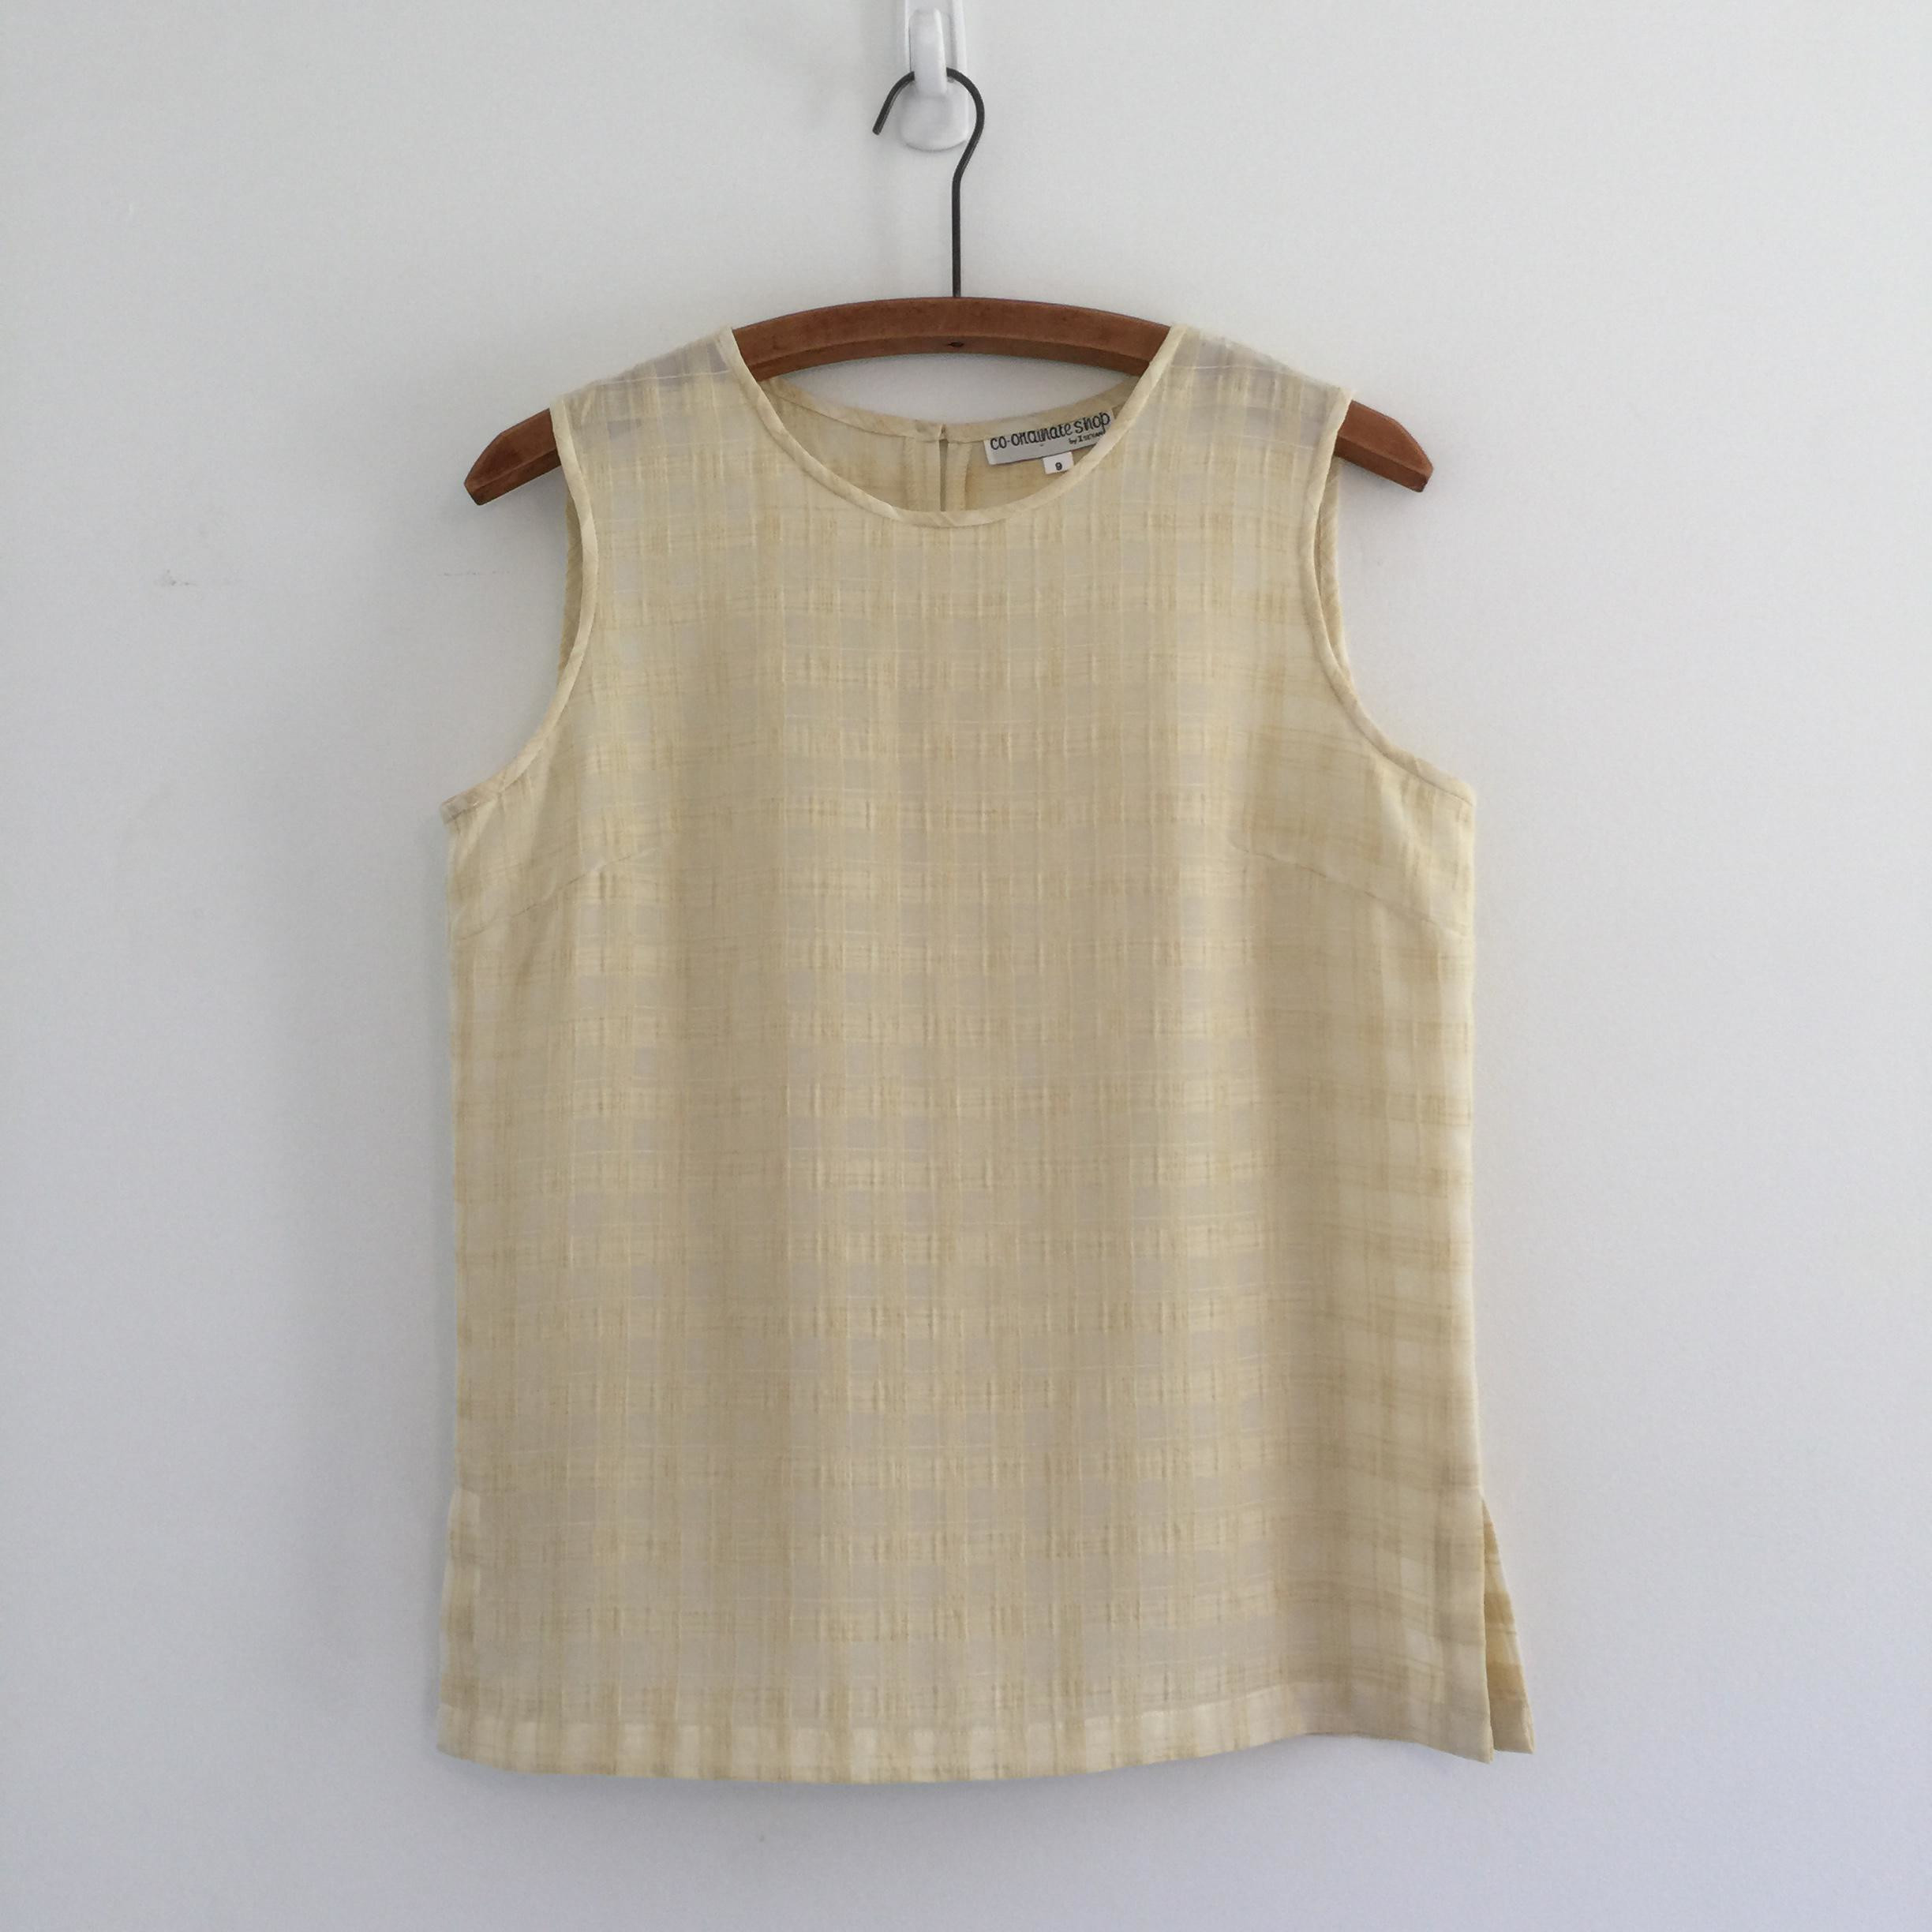

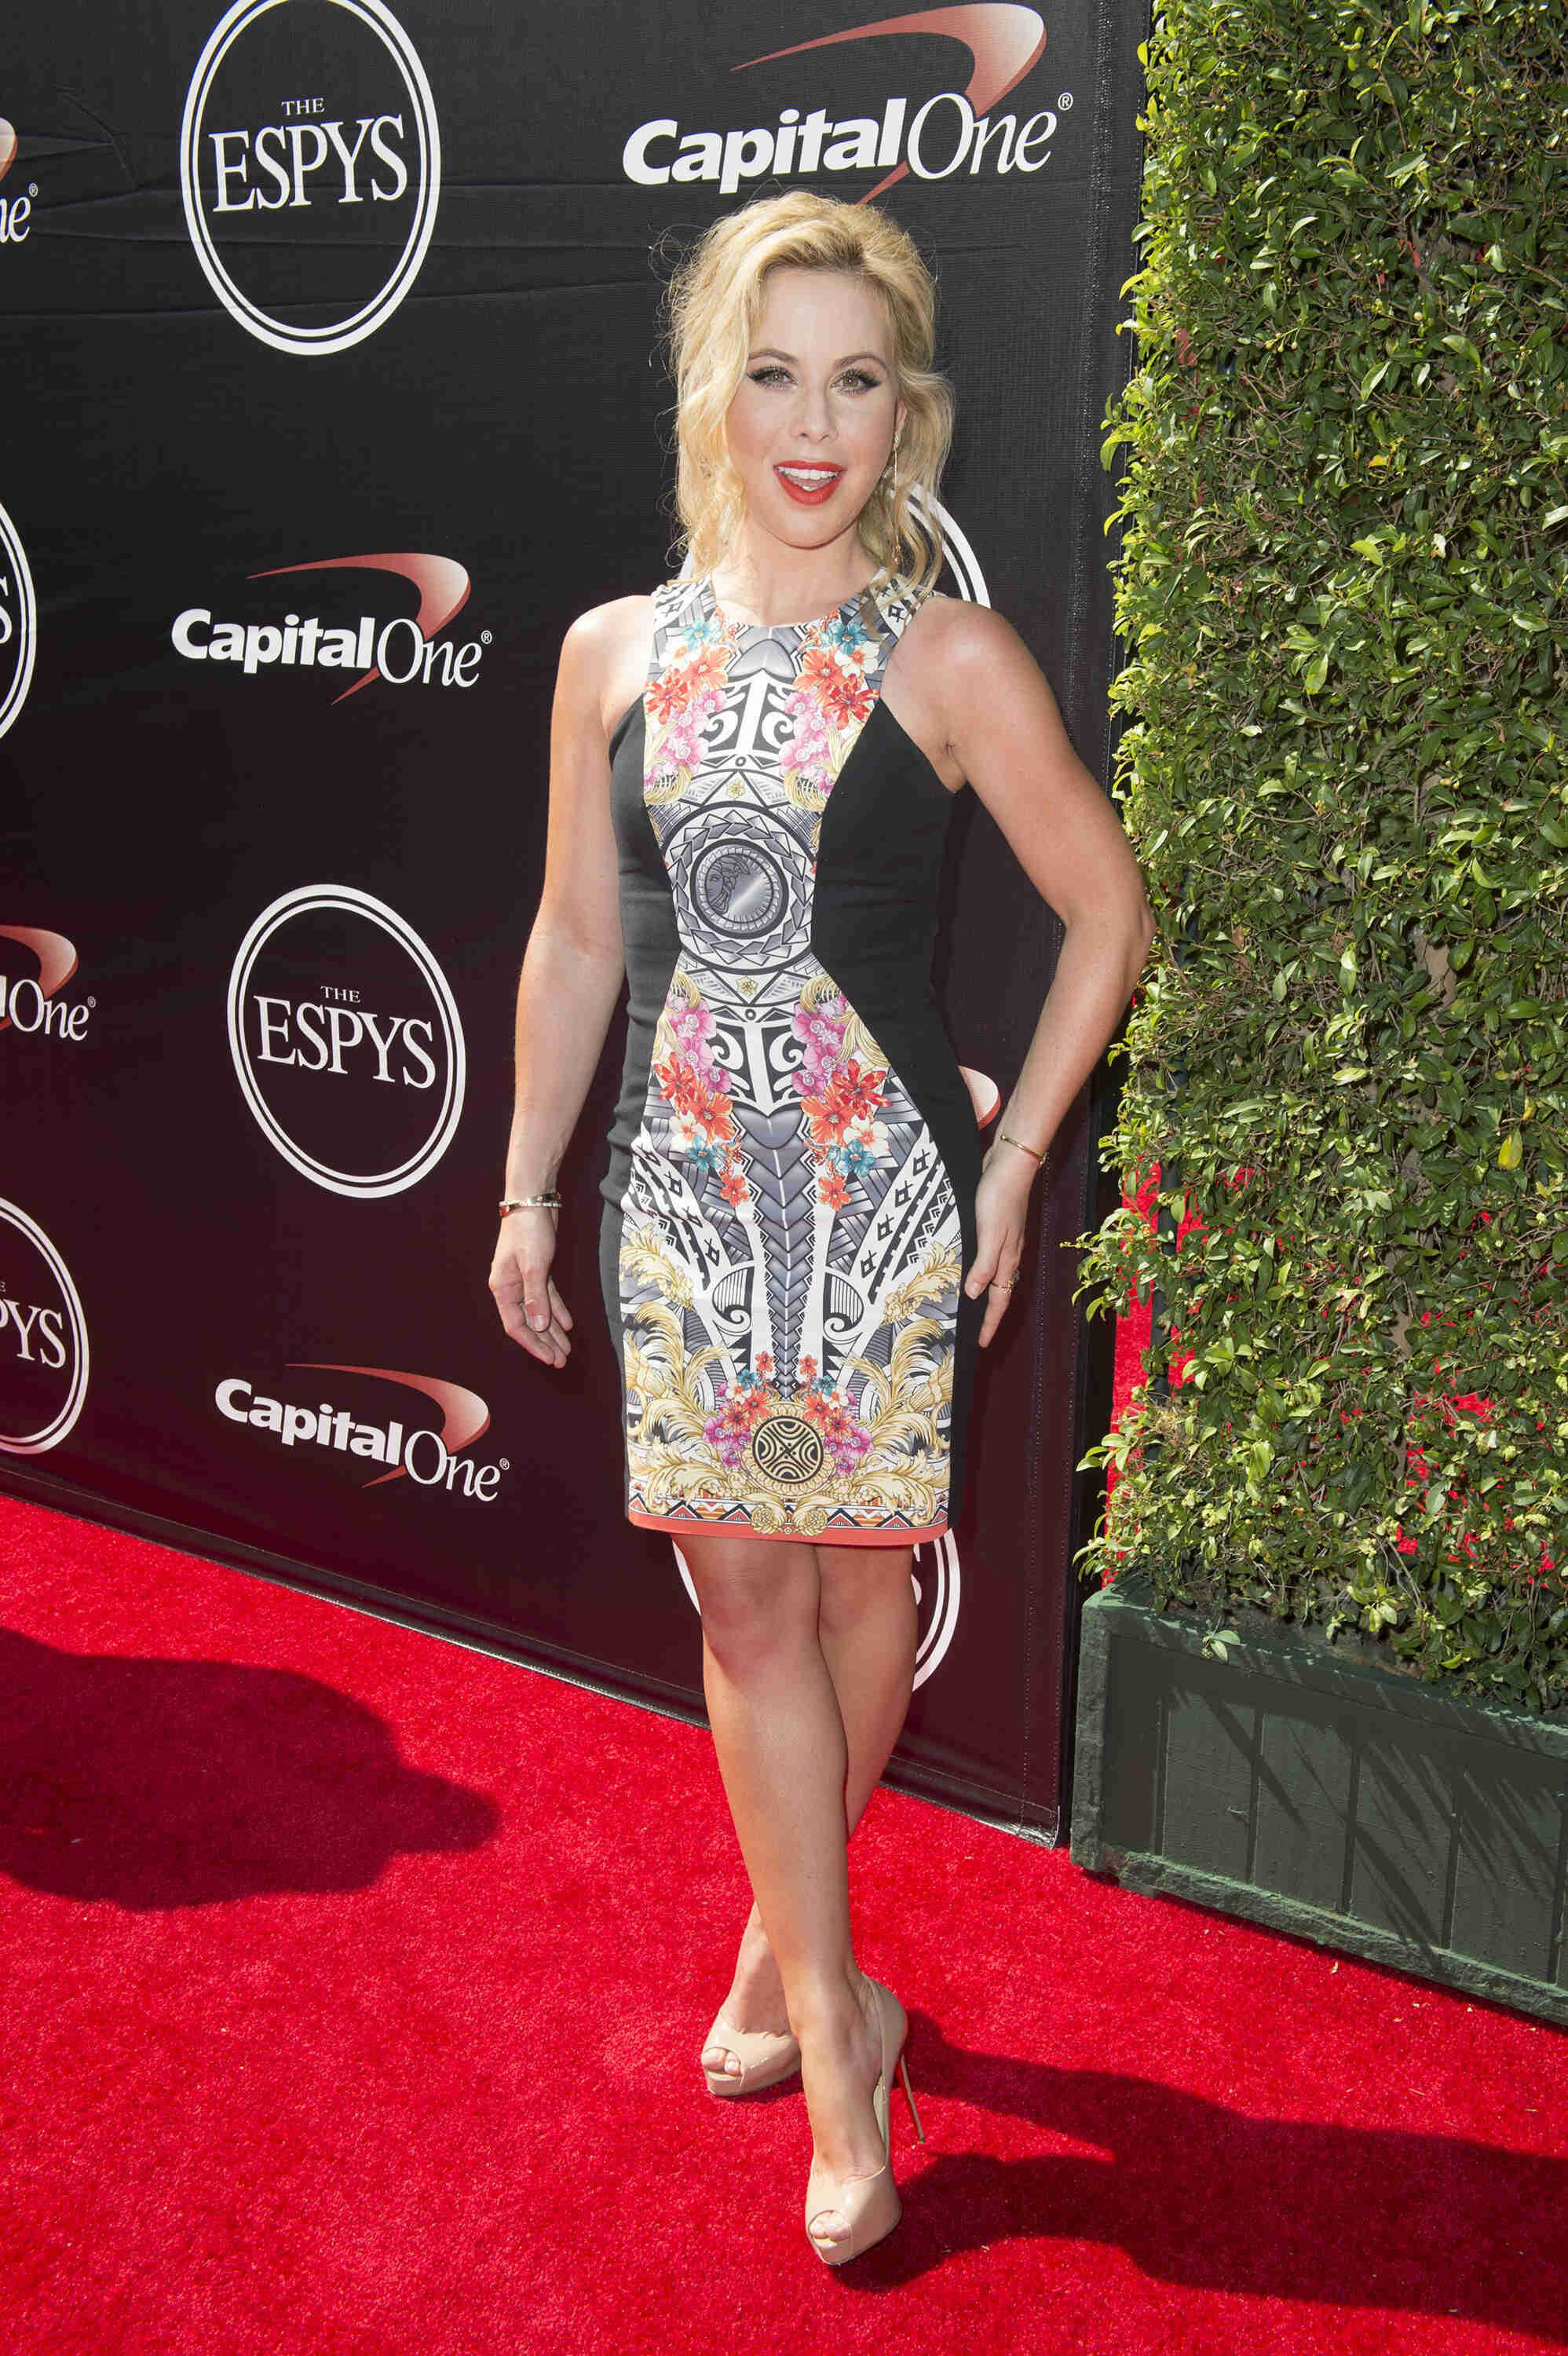

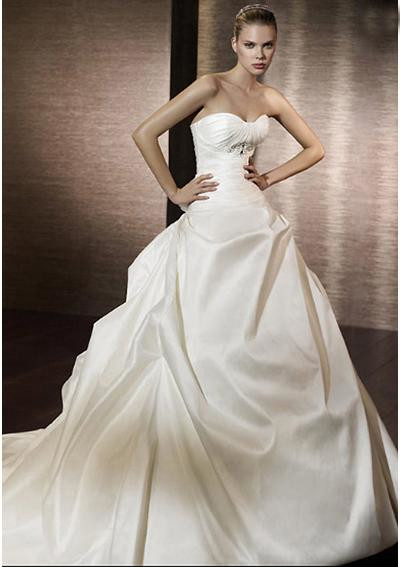

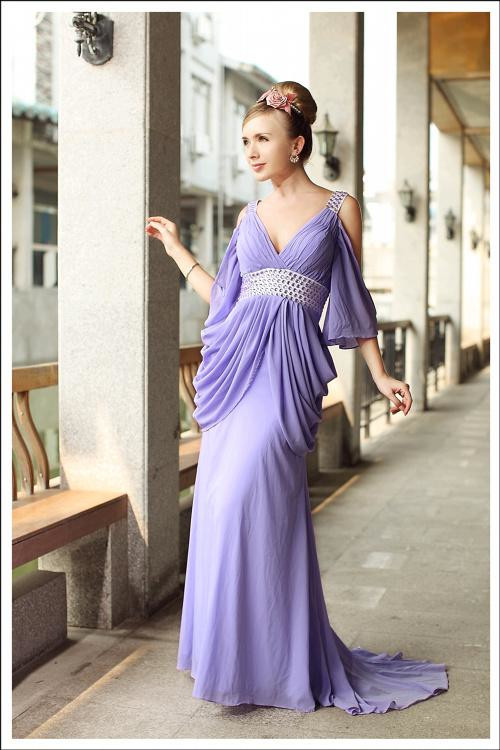

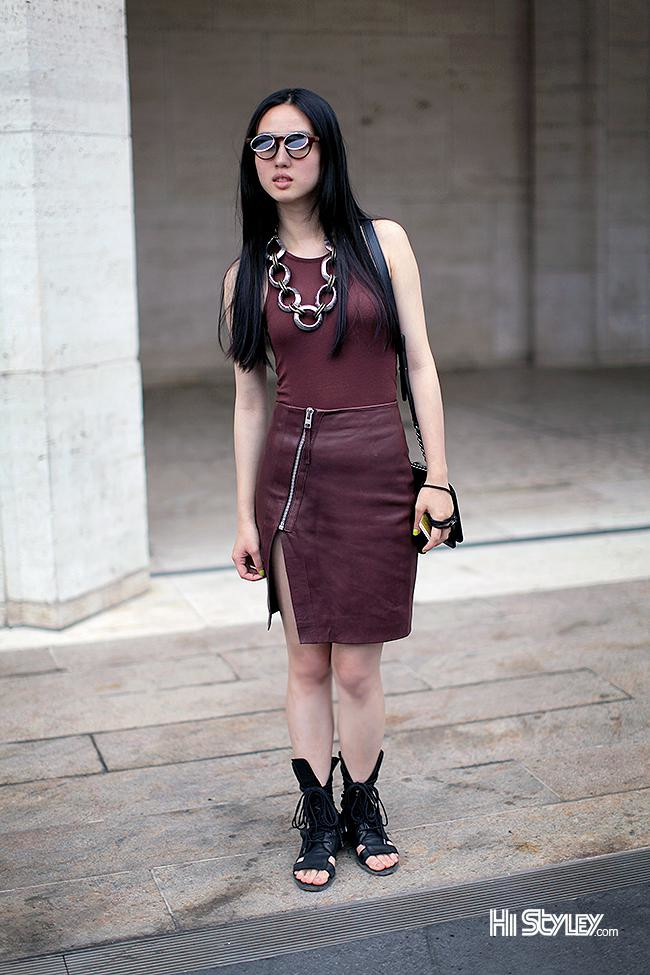

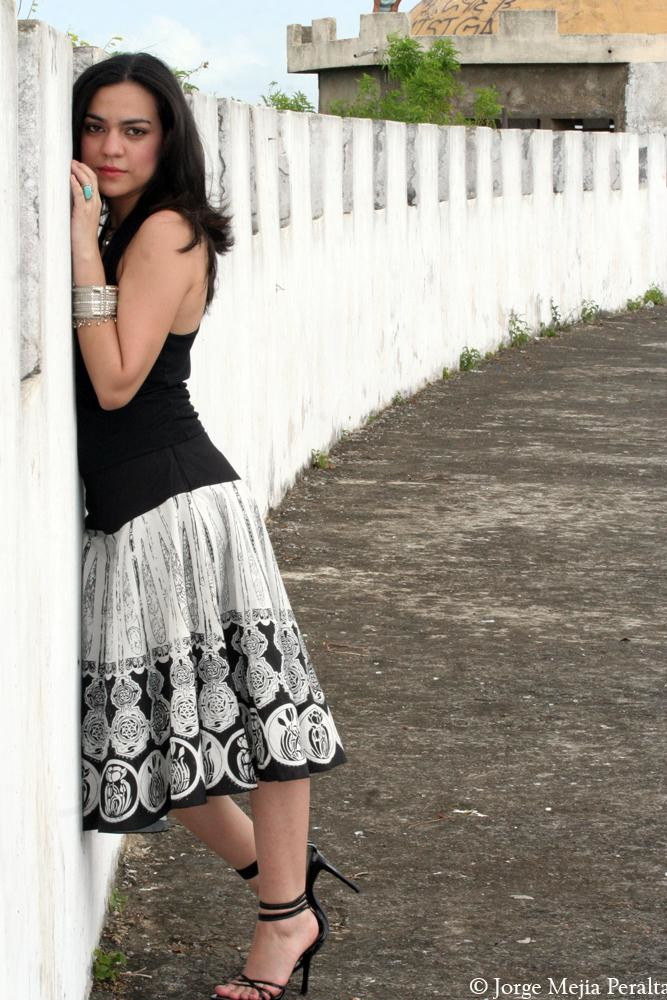

In [55]:
for imageName in listOfImageNames:
    display(Image(filename=f'{path_to_dir}//{imageName}'))